# **<p style="font-family:newtimeroman;font-size:200%;text-align:center;color:#a85d07;">Emotions Analysis | Bidirectional GRU | Accuracy 94%</p>**

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#a85d07;">About Author</p>**
## - ***`Project:` Emotions Analysis***

## ***Introduction***
### ***👋 Hello, everyone! My name is Mehak Iftikhar, and I'm delighted to introduce myself to you. I am a Junior Data Scientist passionate about leveraging data to derive meaningful insights and drive impactful decisions. With a keen interest in exploring the realms of data science, I actively engage in various projects and share my learnings through platforms like Kaggle. It's worth mentioning that I've earned the title of Kaggle 2x Expert.***

## ***About Me***
### ***🔍 As a Junior Data Scientist, I immerse myself in the world of data, constantly seeking innovative ways to analyze, interpret, and visualize information to solve real-world problems. My journey in data science is fueled by a curiosity to unravel patterns, discover trends, and uncover hidden insights within complex datasets.***

## ***My Work***
### ***📊 I regularly upload my data analysis notebooks and projects on Kaggle, where I showcase my skills in data manipulation, exploratory data analysis (EDA), machine learning, and more. Through these notebooks, I aim to contribute to the data science community by sharing methodologies, code snippets, and insights gained from my projects.***

## ***Passion & Goals***
### ***💡 My passion for data science extends beyond technical skills. I am dedicated to continuous learning and improvement, staying updated with the latest advancements in the field. My ultimate goal is to harness the power of data to make a positive impact on society, whether it's through enhancing business strategies, addressing societal challenges, or driving innovation in various domains.***

## ***Let's Connect***
### ***🤝 I am always open to collaboration, knowledge sharing, and networking opportunities. Feel free to connect with me on Kaggle or other professional platforms to discuss data science, share ideas, or explore potential collaborations.***


## ***Contact Info***
### ***Click on link below to contact/follow/correct me:***



# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#a85d07;">About The Dataset</p>**
## ***Introduction:***
### ***Welcome to the "Emotions" dataset – a collection of English Twitter messages meticulously annotated with six fundamental emotions: anger, fear, joy, love, sadness, and surprise. This dataset serves as a valuable resource for understanding and analyzing the diverse spectrum of emotions expressed in short-form text on social media.***

### ***`Dataset link:`*** [Emotions](https://www.kaggle.com/datasets/nelgiriyewithana/emotions/data)

## ***About the Dataset:***
### ***Each entry in this dataset consists of a text segment representing a Twitter message and a corresponding label indicating the predominant emotion conveyed. The emotions are classified into six categories: `sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)`. Whether you're interested in sentiment analysis, emotion classification, or text mining, this dataset provides a rich foundation for exploring the nuanced emotional landscape within the realm of social media.***

## ***Key Features:***
### ***text: A string feature representing the content of the Twitter message.***
### ***label: A classification label indicating the primary emotion, with values ranging from 0 to 5.***

## ***Potential Use Cases:***
### ***`Sentiment Analysis`: Uncover the prevailing sentiments in English Twitter messages across various emotions.***
### ***`Emotion Classification`: Develop models to accurately classify tweets into the six specified emotion categories.***
### ***`Textual Analysis`: Explore linguistic patterns and expressions associated with different emotional states.***

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#a85d07;">Import Libraries</p>**

In [97]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
nltk.download('wordnet')
from keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.layers import GRU, Dense, Embedding, Flatten, Dropout
from keras.activations import softmax
from sklearn.model_selection import train_test_split
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#a85d07;">Read csv file</p>**

In [98]:
df = pd.read_csv('E:/nlp/project/text.csv')
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


# **<p style="font-family:newtimeroman;font-size:130%;text-align:center;color:#a85d07;">Renaming Columns Names</p>**

In [99]:
# Rename columns
df.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)
# Drop Column
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


#### **<h1 align="center"><span style="color:#a85d07;">Check Data Shape</span>**

In [100]:
df.shape

(416809, 2)

In [101]:
# Define a dictionary to map numerical labels to corresponding emotions
label_map = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}

# Replace numerical labels with corresponding emotions in the 'Label' column
df['Label'] = df['Label'].map(label_map)

In [102]:
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,Fear
1,ive enjoyed being able to slouch about relax a...,Sadness
2,i gave up my internship with the dmrg and am f...,Fear
3,i dont know i feel so lost,Sadness
4,i am a kindergarten teacher and i am thoroughl...,Fear


# **<p style="font-family:newtimeroman;font-size:130%;text-align:center;color:#a85d07;">Distribution of Emotions</p>**
## ***Code working:***
## ***1. Calculate the count of each label:***

### ***- The `value_counts()` function is applied to the 'Label' column of the DataFrame `(df)` to count the occurrences of each unique label.***

## ***2. Plotting the pie chart:***

### ***- Create a new figure for the pie chart with a specified size using `plt.figure(figsize=(8, 8))`.***
### ***- Use `plt.pie()` to create the pie chart. It takes the label counts as input data, along with other parameters:***
#### ***- `labels=label_counts.index`: Assigns the unique labels as pie chart labels.***
#### ***- `autopct='%1.1f%%'`: Formats the percentage display with one decimal place.***
#### ***- `startangle=140`: Sets the angle at which the pie chart starts.***

### ***- Set the title of the pie chart using `plt.title('Distribution of Emotions')`.***
### ***- Use `plt.axis('equal')` to ensure the pie chart is drawn as a circle.***
### ***- Finally, display the pie chart using `plt.show()`.***

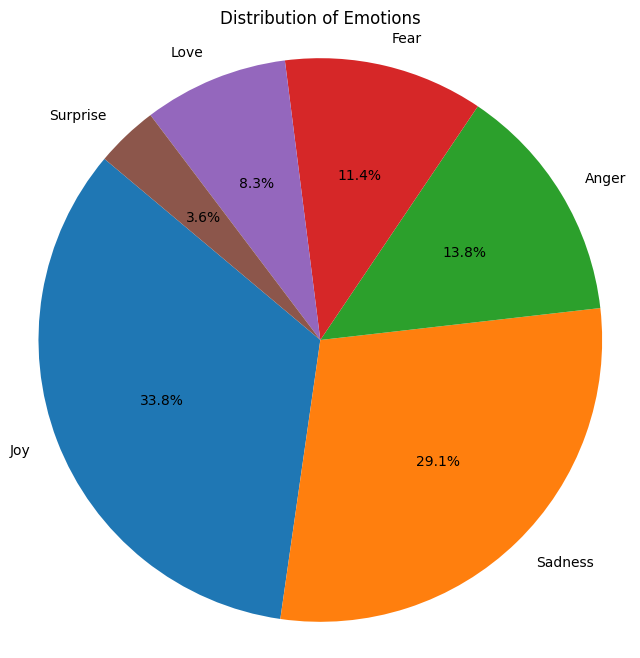

In [103]:
# Calculate the count of each label
label_counts = df['Label'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Emotions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# **<p style="font-family:newtimeroman;font-size:130%;text-align:center;color:#a85d07;">Text Visualization</p>**
## ***Code working:***
### ***- `Iterate through unique labels`: This loop iterates through each unique label in the 'Label' column of the DataFrame `df`.***

### ***- `Filter the DataFrame for the current label`: Inside the loop, the code filters the DataFrame `df` to create a new DataFrame `filtered_df` containing only the rows where the 'Label' column matches the current label.***

### ***- `Concatenate all text data for the current label`: The code then concatenates all the text data from the 'Text' column of `filtered_df` into a single string variable named `text`.***

### ***- `Generate word cloud`: Using the concatenated text data `(text)`, the code generates a word cloud using the WordCloud module. The word cloud is configured to have a width of 800 pixels, a height of 400 pixels, and a white background.***

### ***- `Plot the word cloud`: Finally, the code plots the generated word cloud using Matplotlib. Each word's size in the word cloud is proportional to its frequency in the concatenated text data. The title of each word cloud plot includes the current label being processed. The `plt.axis('off')` command is used to hide the axes of the plot.***

### ***This process repeats for each unique label, generating a separate word cloud for each label based on the text data associated with that label.***

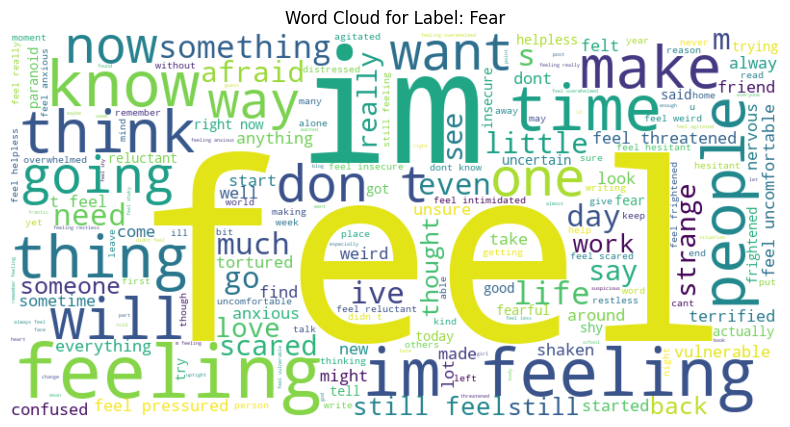

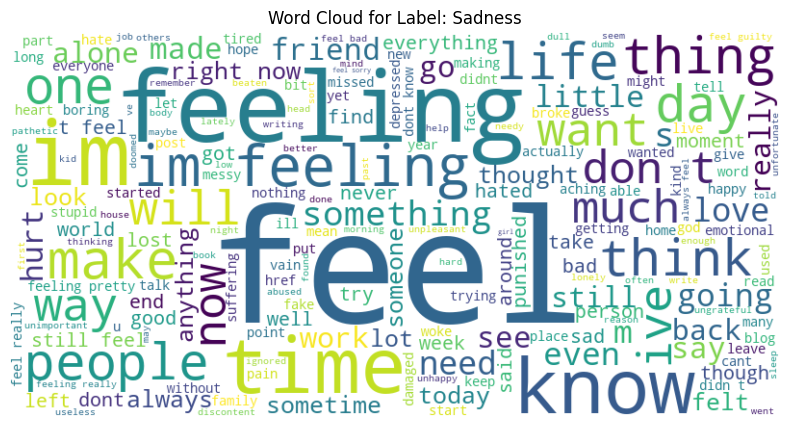

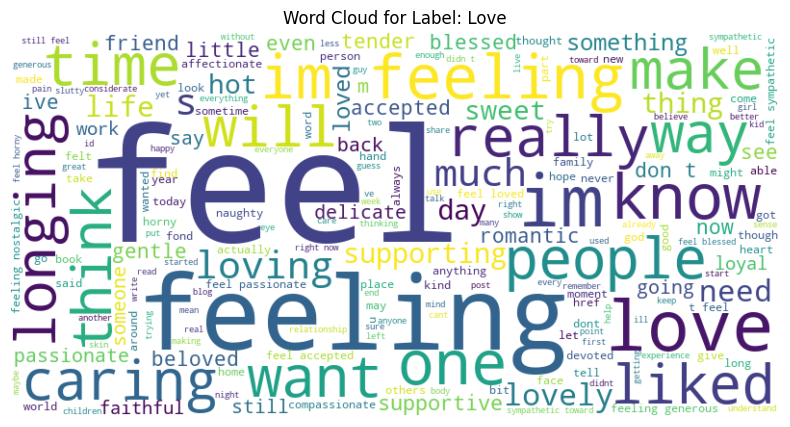

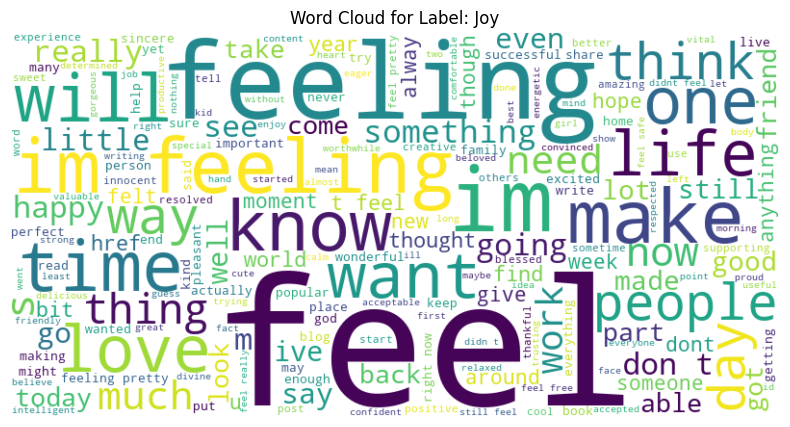

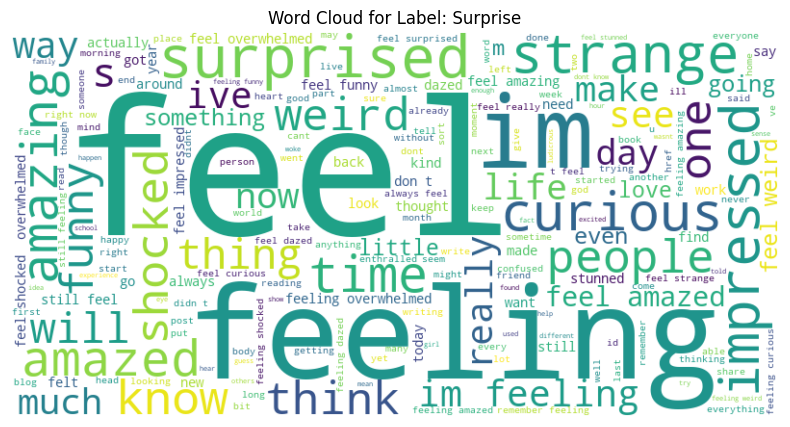

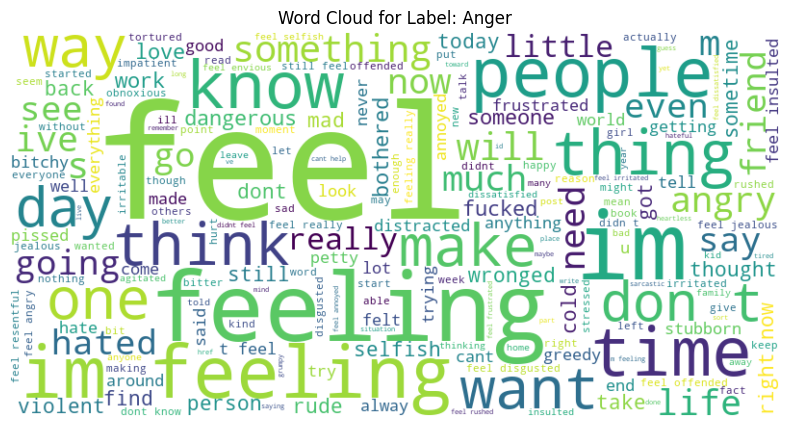

In [104]:
# Iterate through unique labels
for label in df['Label'].unique():
    # Filter the DataFrame for the current label
    filtered_df = df[df['Label'] == label]
    
    # Concatenate all text data for the current label
    text = ' '.join(filtered_df['Text'])
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Label: {label}')
    plt.axis('off')
    plt.show()

In [105]:
# Let's revert the labels back to their original numeric values
label_mapping = {'Sadness': 0, 'Joy': 1, 'Love': 2, 'Anger': 3, 'Fear': 4, 'Surprise': 5}

# Reverse mapping to convert labels back to numeric values
df['Label'] = df['Label'].replace(label_mapping)

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#a85d07;">Preprocessing</p>**
### ***1. Lower Casing***
### ***2. Remove Extra White Spaces***
### ***3. Remove HTML Tags***
### ***4. Remove URLs***
### ***5. Remove Punctuations***
### ***6. Handling ChatWords***
### ***7. Handling StopWords***
### ***8. Handling Emojis***
### ***9. Stemming***

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#a85d07;">LowerCasing Text</p>**
## ***Code working:***
### ***- `df['Text'] = df['Text'].str.lower()`: This line of code converts all the text in the 'Text' column of the DataFrame `df` to lowercase. It uses the `str.lower()` method to apply lowercase transformation to each element in the 'Text' column.***

### ***- `df.head()`: This command displays the first few rows of the DataFrame `df` after the transformation. It helps in verifying that the transformation has been applied correctly.***

In [106]:
# Convert 'Text' column to lowercase
df['Text'] = df['Text'].str.lower()
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#a85d07;">Remove Extra WhiteSpaces</p>**
## ***Code working:***
### ***- `df['Text']`: This selects the 'Text' column from the DataFrame `df`.***
### ***- `.str.strip()`: This is a string method that removes leading and trailing whitespaces from each element in the 'Text' column.***
### ***- `df.head()`: This displays the first few rows of the DataFrame `df` after applying the `strip()` method to the 'Text' column.***

In [107]:
# Remove extra white spaces from the 'Text' column
df['Text'] = df['Text'].str.strip()
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#a85d07;">Remove HTML Tags</p>**
## ***Code working:***
### ***- The function remove_html_tags accepts a string of text as its parameter.***
### ***- It creates a BeautifulSoup object soup by passing the input text and specifying the parser as `html.parser`. BeautifulSoup is a Python library for parsing `HTML` and `XML` documents.***
### ***- The get_text() method of the BeautifulSoup object is then called to extract the text content from the HTML, excluding any `HTML tags`.***
### ***- The cleaned text without `HTML tags` is returned from the function.***
   ### ***After defining the function, the code applies this function to the `Text` column of a DataFrame named df using the `apply()` method. This effectively `removes HTML tags` from each entry in the `Text` column of the DataFrame.***

In [108]:
# Function to remove HTML tags from text
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Remove HTML tags from 'Text' column
df['Text'] = df['Text'].apply(remove_html_tags)

In [109]:
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#a85d07;">Remove URLs</p>**
## ***Code working:***
### ***- The regular expression `r'http\S+|www\S+'` matches any sequence of characters that starts with `http` or `www` followed by any non-whitespace characters `(\S+)`.***
### ***- The `re.sub()` function is then used to replace all matches of this pattern in the input text with an empty string, effectively removing them.***
### ***- Finally, the `apply()` function is used to apply this `remove_urls` function to each element in the 'Text' column of the DataFrame `df`, thus removing URLs from all the text entries in that column.***

In [110]:
# Define a function to remove URLs using regular expressions
def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

# Apply the function to the 'Text' column
df['Text'] = df['Text'].apply(remove_urls)

In [111]:
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#a85d07;">Remove Punctuations</p>**
## ***Code working:***
### ***- `string.punctuation`: This is a predefined string in the Python `string` module that contains all punctuation characters. For example, '!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~`.**

### ***- `punctuation = string.punctuation`: This line assigns the string of punctuation characters to the variable `punctuation`.***

### ***- `def remove_punctuation(text)`: This defines a function named `remove_punctuation` that takes a `text` parameter as input.***

### ***- `return text.translate(str.maketrans('', '', punctuation))`: Inside the `remove_punctuation` function, the `translate()` method is used to remove punctuation characters from the input `text`. The `maketrans()` function generates a translation table, and `translate()` applies this table to remove characters.***

### ***- `df['Text'] = df['Text'].apply(remove_punctuation)`: This line applies the `remove_punctuation` function to each element in the 'Text' column of the DataFrame `df` using the `apply()` function. As a result, punctuation characters are removed from each text entry in the 'Text' column.***

In [112]:
string.punctuation

# Define the punctuation characters to remove
punctuation = string.punctuation

In [113]:
# Function to remove punctuation from text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))

# Apply remove_punctuation function to 'Text' column
df['Text'] = df['Text'].apply(remove_punctuation)

In [114]:
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#a85d07;">Handling ChatWords</p>**
## ***Code working:***
### ***- The code defines a dictionary named `chat_words` which contains abbreviations commonly used in chat conversations along with their corresponding full forms.***

### ***- Then, a function named `replace_chat_words` is defined, which takes a text input, splits it into individual words, and iterates through each word. If a word is found in the `chat_words` dictionary (after converting it to lowercase), it replaces the word with its full form. Finally, it joins all the words back together into a single string.***

### ***- The `replace_chat_words` function is applied to the 'Text' column of a DataFrame named `df` using the `apply` method, which replaces the chat words in each text entry of the 'Text' column.***

### ***- This code essentially performs text preprocessing by replacing chat abbreviations with their full forms, which can be useful for tasks like sentiment analysis, text classification, or any natural language processing (NLP) task where understanding the full meaning of text is important.***

In [115]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [116]:
# Function to replace chat words with their full forms
def replace_chat_words(text):
    words = text.split()
    for i, word in enumerate(words):
        if word.lower() in chat_words:
            words[i] = chat_words[word.lower()]
    return ' '.join(words)

# Apply replace_chat_words function to 'Text' column
df['Text'] = df['Text'].apply(replace_chat_words)


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#a85d07;">Handling StopWords</p>**
## ***Code working:***
### ***- Downloads the stopwords corpus from NLTK (Natural Language Toolkit), which contains a list of common stopwords in English.***
### ***- Imports the stopwords module from NLTK.***
### ***- Defines a function `remove_stopwords(text)` that takes a string of text as input.***
### ***- Within the function, it splits the input text into individual words.***
### ***- Iterates through each word in the text and checks if it is not in the set of English stopwords. If a word is not a stopword, it is added to a list of filtered words.***
### ***- Joins the filtered words back into a single string, separated by spaces, and returns this string.***
### ***- Applies the `remove_stopwords` function to the 'Text' column of the DataFrame `df`.***

In [117]:
# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
df['Text'] = df['Text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#a85d07;">Handling Emojis</p>**
## ***Code working:***
### ***- `emoji.demojize(text)`: This function is part of the `emoji` library in Python. It converts emojis in the input text into their corresponding textual representation. For example, 😀 would be converted to ":grinning_face:".***
### ***- The function `remove_emojis` applies `emoji.demojize()` to the input text, replacing emojis with their textual representations.***
### ***- The modified text with emojis replaced is returned by the function.***
### ***Then, the function `remove_emojis` is applied to the 'Text' column of a DataFrame `df` using the `apply()` method. This ensures that each text entry in the 'Text' column has its emojis removed.***

In [118]:
# Function to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

# Apply remove_emojis function to 'Text' column
df['Text'] = df['Text'].apply(remove_emojis)

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#a85d07;">Stemming</p>**
## ***Introduction:***
### ***`Stemming` is a text processing technique used in natural language processing `(NLP)` to reduce words to their root or base form, known as the stem. The goal of stemming is to normalize words with similar meanings so that variations of the same word are treated as identical. This helps improve text analysis and information retrieval tasks by reducing the complexity of the vocabulary.***

### ***`For example`, stemming would convert words like "running," "runs," and "ran" to the common stem "run." Similarly, "fishes" and "fishing" would both be stemmed to "fish." While stemming can sometimes result in non-real words, it is a simple and efficient method for preprocessing text data in NLP tasks.***

## ***Code Working:***
### ***- Initialization: First, we initialize an instance of the Porter Stemmer by creating an object named `porter_stemmer`.***

### ***- Stemming: Next, we apply stemming to each text in the 'Text' column using a lambda function and the `apply` method. Within the lambda function, we split each text into individual words using the `split()` method. Then, for each word, we apply stemming using the `stem() `method of the Porter Stemmer. The stemmed words are joined back together using `' '.join()`.***

### ***- New Column Creation: The result of stemming is stored in a new column named 'Text_stemmed', which is created using square brackets notation `(df['Text_stemmed'])`.***

In [119]:
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming
df['Text_stemmed'] = df['Text'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#a85d07;">Train Test Split</p>**

In [120]:
X = df['Text']
y = df['Label']

# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#a85d07;">Tokenization and Padding Sequences</p>**
## ***Code working:***
## ***1. Tokenization:***

### ***- Tokenization is the process of converting text into numerical tokens.***
### ***- The reinitializes the tokenizer object, this time setting the argument `num_words` to `50000`. This specifies that only the top `50,000 most frequent` words in the dataset will be considered during tokenization. Any words beyond this limit will be ignored.***
### ***- The `fit_on_texts()` method is called on the `Tokenizer` object with the training data `X_train` to build the vocabulary based on the words present in `X_train`.***
### ***- Similarly, the `fit_on_texts()` method is called on the same `Tokenizer` object with the test data `X_test` to ensure consistency in tokenization.***
### ***- `tokenizer.document_count` returns the total number of documents (sentences) processed by the tokenizer.***

## ***2. Conversion to Sequences:***

### ***- `texts_to_sequences()` method is used to convert each text in `X_train` and `X_test` to sequences of integers based on the tokenizer's vocabulary.***
### ***- `X_train_sequences` and `X_test_sequences` now contain sequences of integers representing the words in the original texts.***

## ***3. Padding:***

### ***- The maximum length of sequences in `X_train_sequences` is determined using a list comprehension.***
### ***- `pad_sequences()` function is then applied to both `X_train_sequences` and `X_test_sequences` to ensure all sequences have the same length (`maxlen`) by padding shorter sequences with zeros at the end (post-padding).***
### ***- `maxlen` represents the maximum sequence length found in the training data.***

In [121]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

In [122]:
tokenizer.document_count

416809

In [123]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [124]:
# Max Len in X_train_sequences
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 79


In [125]:
# Perform padding on X_train and X_test sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

In [126]:
# Print the padded sequences for X_train and X_test
print("X_train_padded:")
print(X_train_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:
[[   16 30396    69 ...     0     0     0]
 [  268     5   723 ...     0     0     0]
 [    1    44   721 ...     0     0     0]
 ...
 [    1   591     0 ...     0     0     0]
 [    4    15   473 ...     0     0     0]
 [    1   147  1739 ...     0     0     0]]

X_test_padded:
[[  120    39   169 ...     0     0     0]
 [ 3033 14468   785 ...     0     0     0]
 [  188   303    48 ...     0     0     0]
 ...
 [  841   271  1955 ...     0     0     0]
 [ 1907  7254   634 ...     0     0     0]
 [   82     1   400 ...     0     0     0]]


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#a85d07;">Vocabulary Size</p>**
## ***Code working:***
### ***- `set(token for sequence in X_train_padded for token in sequence)`: This part of the code iterates over each sequence in the `X_train_padded` dataset and then iterates over each token (or word) in each sequence. It creates a set of unique tokens present in all sequences. Using a set ensures that each token is unique, eliminating duplicate tokens.***

### ***- `len(...)`: This calculates the length of the set obtained in the previous step, which corresponds to the number of unique tokens in the entire training dataset.***

### ***- `vocabulary_size`: This variable stores the calculated length, representing the size of the vocabulary in the training dataset. In natural language processing, the vocabulary size refers to the total number of unique words (tokens) present in the dataset.***

In [127]:
# Embedding Vocabulary Size 
vocabulary_size = 50000
vocabulary_size

50000

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#a85d07;">Model Building</p>**
## ***Code working:***
### ***- `Sequential`: This initializes a sequential model, allowing you to build the model layer by layer in a linear fashion.***

### ***- `Embedding layer`: This layer is responsible for converting integer-encoded words into dense vectors of fixed size. It takes three parameters: `input_dim`, which specifies the size of the vocabulary (in this case, `vocabulary_size`), `output_dim`, which determines the dimension of the dense embedding, and `input_length`, which specifies the length of input sequences (in this case, `maxlen`).***

### ***- `Bidirectional GRU layer`: This layer adds a `bidirectional Gated Recurrent Unit (GRU)` layer with `128 units`. GRU is a type of recurrent neural network (RNN) that is similar to LSTM but has fewer parameters. The bidirectional wrapper allows the GRU to process input sequences in both forward and backward directions, enhancing the model's ability to capture long-range dependencies in the data.***

### ***- `Batch normalization layer`: Batch normalization is a technique used to improve the training speed and stability of neural networks by normalizing the activations of each layer. It helps mitigate the internal covariate shift problem.***

### ***- `Dropout regularization`: Dropout is a regularization technique that randomly sets a fraction of input units to zero during training, which helps prevent overfitting by reducing the reliance on specific neurons.***

### ***- `Dense layer with ReLU activation`: This layer adds a fully connected dense layer with `64 units` and Rectified Linear Unit (ReLU) activation function. ReLU is a non-linear activation function that introduces non-linearity to the model, allowing it to learn complex patterns in the data.***

### ***- `Dropout regularization`: Another dropout layer is added after the dense layer to further prevent overfitting.***

### ***- `Output layer with softmax activation`: The final layer is a dense layer with `6 units` (assuming there are 6 classes) and softmax activation function. `Softmax activation` normalizes the output vector into a probability distribution over the classes, making it suitable for `multi-class classification problems`.***

In [128]:
# Define the model
model = Sequential()

# Add an embedding layer with input_dim=1000, output_dim=100, input_length=75
model.add(Embedding(input_dim=vocabulary_size, output_dim=100, input_length=maxlen))

# Add a bidirectional GRU layer with 128 units
model.add(Bidirectional(GRU(128)))

# Add batch normalization layer
model.add(BatchNormalization())

# Add dropout regularization
model.add(Dropout(0.5))

# Add a dense layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu'))

# Add dropout regularization
model.add(Dropout(0.5))

# Add the output layer with 6 units for 6 labels and softmax activation
model.add(Dense(6, activation='softmax'))

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#a85d07;">Compile The Model</p>**
## ***Code working:***
## ***1. Compiling the Model:***

### ***This line compiles the model by configuring the training process. Here's what each parameter does:***

### ***- `optimizer='adam'`: This specifies the optimization algorithm to be used during training. Adam is a popular optimization algorithm known for its efficiency and effectiveness in training deep neural networks.***
### ***- `loss='sparse_categorical_crossentropy'`: This specifies the loss function to be optimized during training. Sparse categorical crossentropy is commonly used for multi-class classification problems where the target labels are integers.***
### ***`metrics=['accuracy']`: This specifies the evaluation metric to be used during training and testing. In this case, accuracy is chosen as the metric to monitor the model's performance.***

## ***2. Display The Model Summary:***

### ***- This line prints a summary of the model architecture, showing the details of each layer, including the `type of layer`, `output shape`, and `number of parameters`. The summary provides a concise overview of the model's structure, making it easier to understand its architecture and parameters.***

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_padded, y_train, epochs=5, batch_size=128, validation_data=(X_test_padded, y_test))


Epoch 1/5
1605/2606 ━━━━━━━━━━━━━━━━━━━━ 3:55 236ms/step - accuracy: 0.7510 - loss: 0.6716

In [94]:
# Save the model after training (in your training script)
model.save('emotion_detection_model.h5')



In [96]:
keras.saving.save_model(model, 'my_model.keras')

NameError: name 'keras' is not defined

In [95]:
# Save the tokenizer (in your training script)
import pickle

with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#a85d07;">Plotting The Loss And Accuracy</p>**

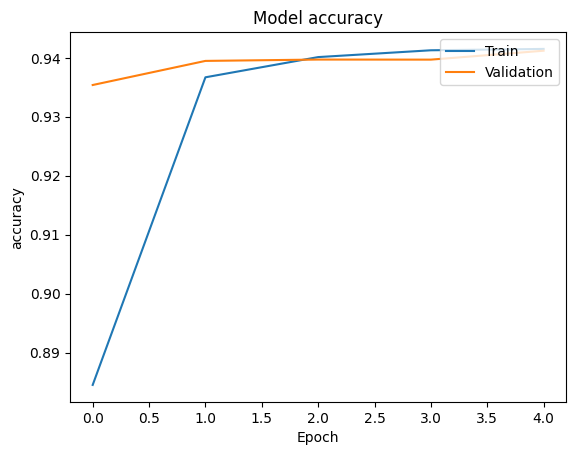

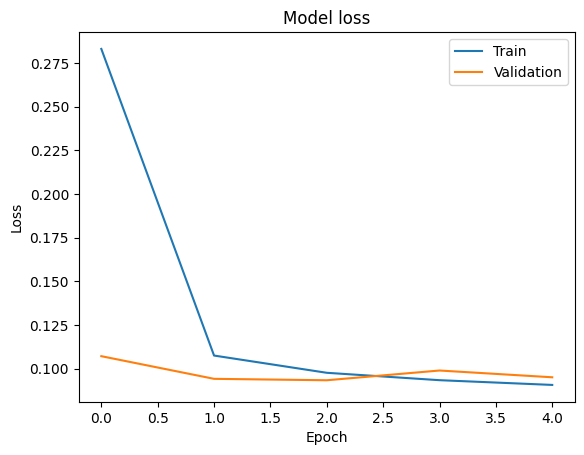

In [45]:
# Plotting the training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()